In [ ]:
import gym
import random
import numpy as np
import time
import matplotlib.pyplot as plt

#np.random.seed(0)
random.seed(123)

# Environment
env = gym.make("Taxi-v3")
# Training parameters for Q learning
alpha = 0.9 # Learning rate
gamma = 0.9 # Future reward discount factor (Discount factor)
num_of_episodes = 1000
num_of_steps = 500 # per each episode

# Q for rewards
Q_reward = np.zeros((env.observation_space.n,env.action_space.n)) #-1*np.ones((500,6))

In [ ]:
sum(training_rewards)

-13531

In [ ]:
epsilon = 0.75 # Rate of exploration
max_epsilon = 1
min_epsilon = 0.01         
decay = 0.01     

n_states = env.observation_space.n
n_actions = env.action_space.n

Training score: -13.493


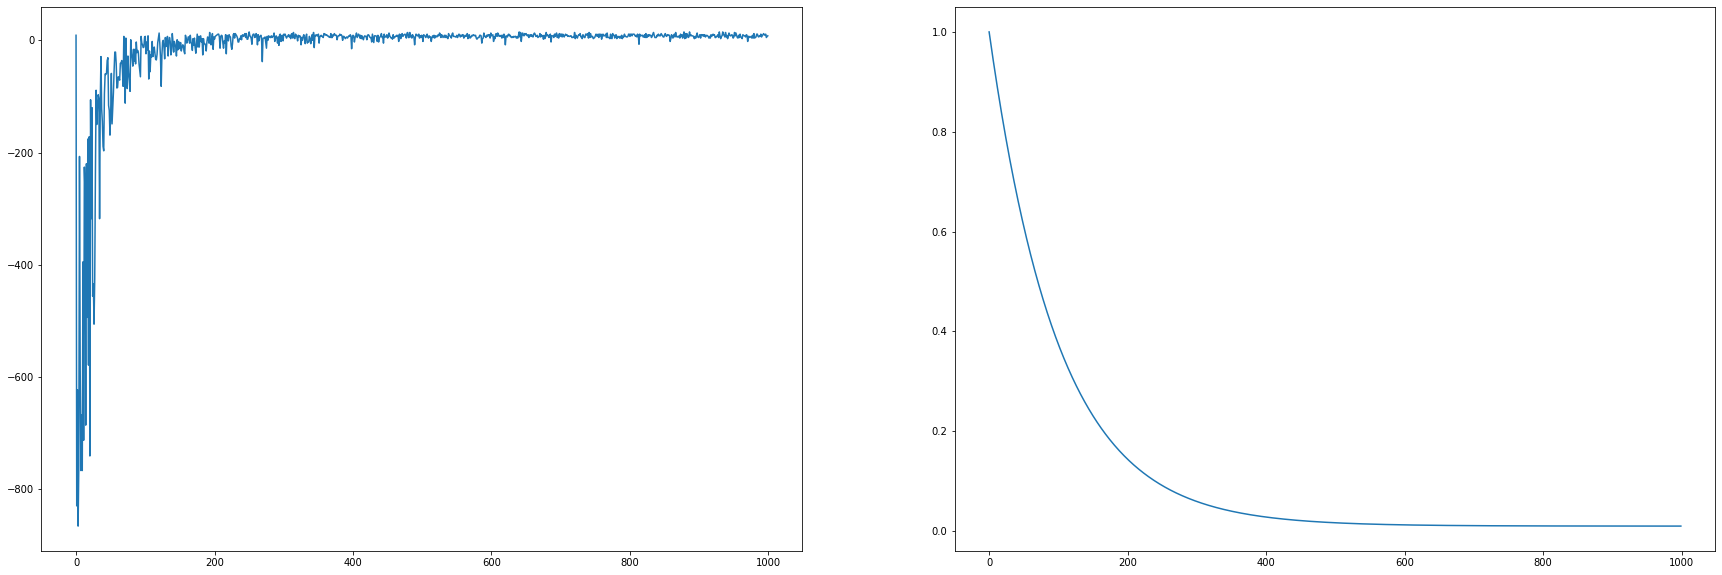

In [ ]:
training_rewards = []  
epsilons = []

for episode in range(num_of_episodes):

    state = env.reset()    

    total_training_rewards = 0
    
    for step in range(num_of_steps):
        

        if random.uniform(0, 1) < epsilon:
          action = env.action_space.sample() # Explore
            
        else:
          action = np.argmax(Q_reward[state,:]) # Exploit
            
        new_state, reward, done, info = env.step(action)
        
        Q_reward[state, action] = Q_reward[state, action] + alpha * (reward + gamma * np.max(Q_reward[new_state, :]) - Q_reward[state, action]) 

        total_training_rewards += reward
        state = new_state         

        if done == True:
            break

    epsilon = min_epsilon + ( max_epsilon - min_epsilon ) * np.exp( -decay * episode ) # Adjust epsilon

    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)

print(f"Training score: {sum(training_rewards)/num_of_episodes}")
fig, ax = plt.subplots(1, 2, figsize=(30,10));
ax[0].plot([i for i in range(num_of_episodes)], training_rewards);
ax[1].plot([i for i in range(num_of_episodes)], epsilons);

In [ ]:
rewards = []
actions = []

for i in range(10):
  state = env.reset()
  tot_reward = 0
  for step in range(50):
    action = np.argmax(Q_reward[state,:])
    state, reward, done, info = env.step(action)
    tot_reward += reward
    #env.render()
    #time.sleep(1)
    if done:
      rewards.append(tot_reward)
      actions.append(step)
      print(f"{i}. total reward: {tot_reward}")
      break
  

0. total reward: 5
1. total reward: 6
2. total reward: 11
3. total reward: 7
4. total reward: 11
5. total reward: 7
6. total reward: 14
7. total reward: 8
8. total reward: 11
9. total reward: 7


In [ ]:
print(f"Rewards: {np.mean(rewards)}\nSteps: {np.mean(actions)}")

Rewards: 8.7
Steps: 11.3
